### Installing dependencies

In [310]:
"""
Install required packages using pip.

Packages:
- pandas
- seaborn
- matplotlib
- scikit-learn
- numpy
- openpyxl
- pipenv

Usage: %pip install pandas seaborn matplotlib scikit-learn numpy openpyxl pipenv
"""
%pip install pandas seaborn matplotlib scikit-learn numpy openpyxl pipenv

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\wesle\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### Importing the necessary libraries for the workflow.

In [246]:
"""
Installed packages are loaded using the import statement. The # type: ignore comment is used to suppress warnings.
"""
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import os # type: ignore
import re # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.decomposition import PCA # type: ignore
from sklearn.experimental import enable_iterative_imputer  # type: ignore
from sklearn.impute import IterativeImputer  # type: ignore

### Loading data

In [426]:
"""
Load data from an Excel file and extract specific features.
"""

# Specify the run. 


print("Loading data...")
data = pd.read_excel("data/01. Master_Latest data_Control clones_LP.xlsx", engine='openpyxl')
#data_extracted_features = pd.read_excel("data/01. Master_Latest data_Control clones_LP.xlsx", usecols=['Batch number', 'Genotype Neuron', 'Div calculated', 'Culture treatment', 'Capacitance', 'Input Resistance', 'Resting membrane potential ', 'Maximum firing ', 'Calculated input resistance', 'Rheobase', 'EPSC freq'])
data_extracted_features = pd.read_excel("data/01. Master_Latest data_Control clones_LP.xlsx", usecols=['Batch number', 'Genotype Neuron', 'Div calculated', 'Culture treatment', 'Capacitance', 'Input Resistance', 'Resting membrane potential ', 'Maximum firing ', 'Rheobase', 'EPSC freq'])

print("\n")
print(data_extracted_features)

Loading data...


     Batch number Genotype Neuron  Div calculated   Culture treatment  \
0               1         TSC12.3              33                none   
1               1         TSC12.3              33                none   
2               1         TSC12.3              33                none   
3               1         TSC12.3              33                none   
4               1         TSC12.3              33                none   
..            ...             ...             ...                 ...   
683             3             WTC              58                none   
684             3             WTC              58  microglia 6 weekes   
685             3             WTC              58                none   
686             3             WTC              58                none   
687             3             WTC              58  microglia 6 weekes   

     Capacitance  Input Resistance  Resting membrane potential   \
0           54.0            2100.0    

### Preprocessing data

### Violin plot before preprocessing

Plotting Batch number...


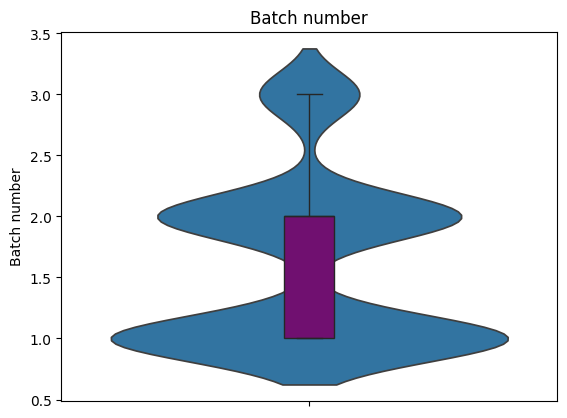

Plotting Genotype Neuron...


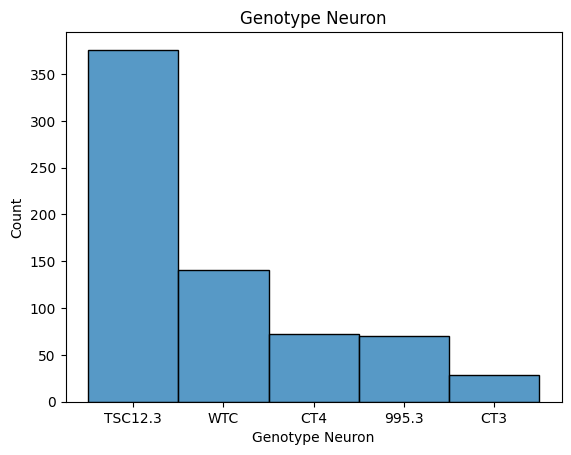

Plotting Div calculated...


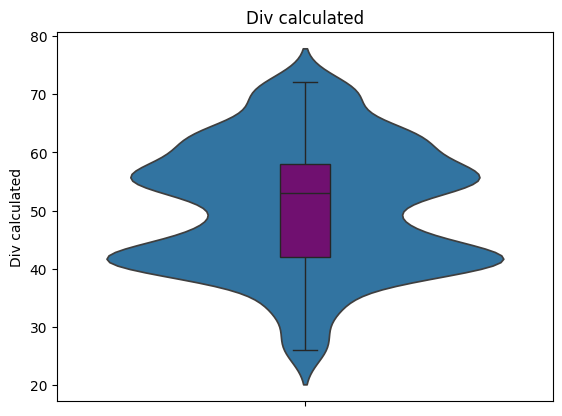

Plotting Culture treatment...


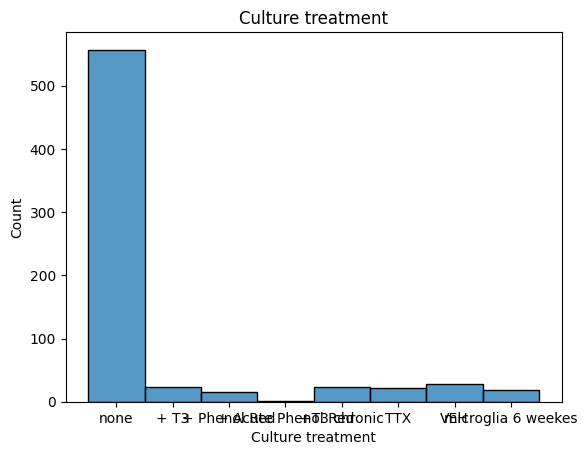

Plotting Capacitance...


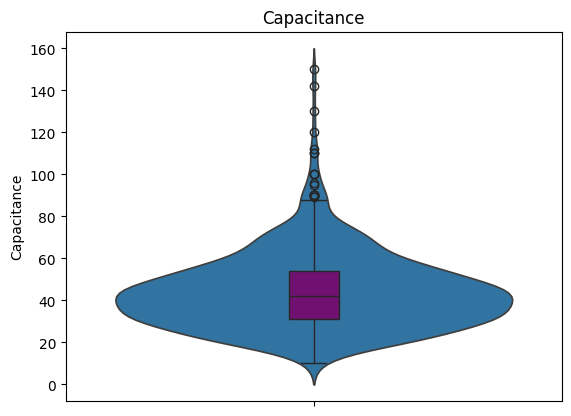

Plotting Input Resistance...


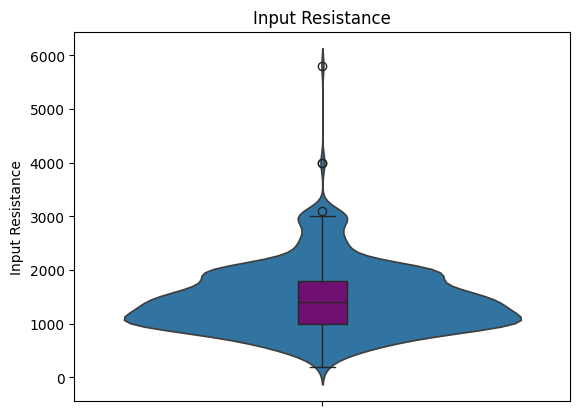

Plotting Resting membrane potential ...


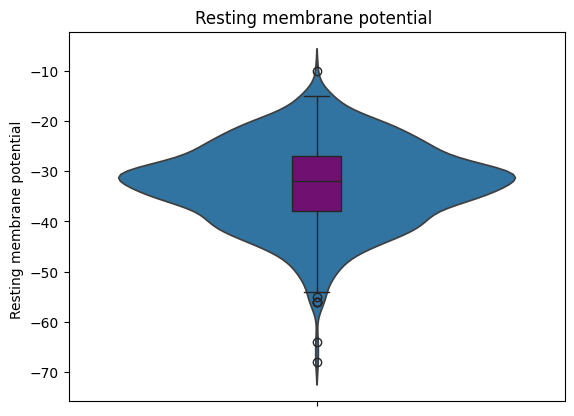

Plotting Maximum firing ...


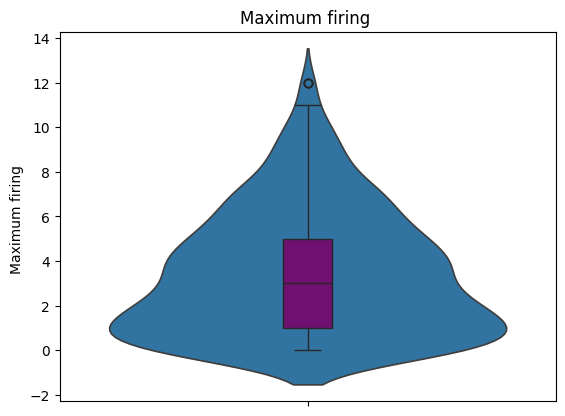

Plotting Rheobase...


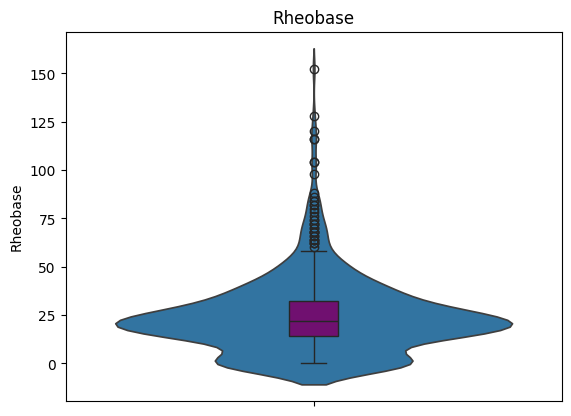

Plotting EPSC freq...


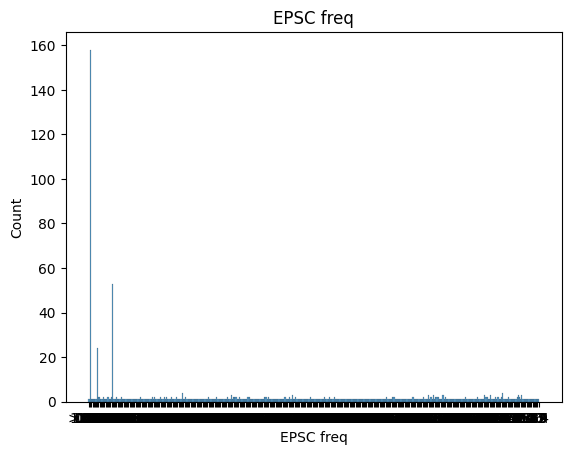

In [248]:
"""
Plots violin and box plots for each feature in the given DataFrame.
"""

# Create a copy of the DataFrame
data_extracted_features_violin_pre = data_extracted_features.copy()

# # Convert 'EPSC freq' to numeric
# data_extracted_features_violin_pre['EPSC freq'] = pd.to_numeric(data_extracted_features_violin_pre['EPSC freq'])

# # Create subplots
# fig, axes = plt.subplots(4, 3, figsize=(30, 30))
# axes = axes.flatten()

# # Iterate over each feature in the DataFrame
# for i, feature in enumerate(data_extracted_features_violin_pre.columns): 
#     if feature == 'Batch number':
#         i-=1
#         continue
#     elif feature == 'Genotype Neuron':
#         # Plot violin and box plots for 'Genotype Neuron'
#         sns.violinplot(x=feature, y='Batch number', data=data_extracted_features_violin_pre, ax=axes[i], inner=None)
#         sns.boxplot(x=feature, y='Batch number', data=data_extracted_features_violin_pre, ax=axes[i], width=0.1, color="purple", meanline=True)
#         axes[i].set_title(feature)
#     elif feature == 'Culture treatment':
#         # Plot violin and box plots for 'Culture treatment'
#         sns.violinplot(x=feature, y='Batch number', data=data_extracted_features_violin_pre, ax=axes[i], inner=None)
#         sns.boxplot(x=feature, y='Batch number', data=data_extracted_features_violin_pre, ax=axes[i], width=0.1, color="purple", meanline=True)
#         axes[i].set_title(feature)
#     else:
#         # Plot violin and box plots for other features
#         sns.violinplot(x='Batch number', y=feature, data=data_extracted_features_violin_pre, ax=axes[i], inner=None)
#         sns.boxplot(x='Batch number', y=feature, data=data_extracted_features_violin_pre, ax=axes[i], width=0.1, color="purple", meanline=True)
#         axes[i].set_title(feature)

#print(data_extracted_features_violin_pre['Genotype Neuron'].value_counts())
#sns.histplot(data=data_extracted_features_violin_pre['Genotype Neuron'])
#plt.show()   

for i, feature in enumerate(data_extracted_features_violin_pre.columns): 
    print(f"Plotting {feature}...")
    if not os.path.exists('run_1/qc/plots/raw'):
        os.makedirs('run_1/qc/plots/raw')
    if data_extracted_features_violin_pre[feature].dtype == 'object':
        # Plot violin and box plots for categorical features
        sns.histplot(data=data_extracted_features_violin_pre[feature].astype(str))
        plt.title(feature)
        plt.savefig(f"run_1/qc/plots/raw/{'_'.join(feature.split(' '))}_hist.png")
        plt.show()
        #sns.boxplot(data=data_extracted_features_violin_pre, width=0.1, color="purple", meanline=True)
    else:
        # Plot violin and box plots for other features
        sns.violinplot(data=data_extracted_features_violin_pre[feature], inner=None)
        sns.boxplot(data=data_extracted_features_violin_pre[feature], width=0.1, color="purple", meanline=True)
        plt.title(feature)
        plt.savefig(f"run_1/qc/plots/raw/{'_'.join(feature.split(' '))}_violin.png")
        plt.show()


#sns.histplot(data=data_extracted_features_violin_pre['Culture treatment'])   
# Plot violin and box plots for 'EPSC freq' feature
#sns.violinplot(data=data_extracted_features_violin_pre["Div calculated"], inner=None)

# for feature in data_extracted_features_violin_pre.columns:
#     sns.violinplot(data=data_extracted_features_violin_pre[feature], inner=None)

# Adjust the layout and display the plot
#plt.tight_layout()
# plt.show()


In [466]:
data_extracted_features_ranges = data_extracted_features.copy()
mask = data_extracted_features_ranges['EPSC freq'].notna() & data_extracted_features_ranges['EPSC freq'].str.contains(">")
data_extracted_features_ranges = data_extracted_features_ranges.loc[mask, 'EPSC freq']

for item in data_extracted_features_ranges: 
    item = item.strip(">").replace("<", '')
    print(item)

0 0.5
0.5
0.5
0.5
0.5
0.5
0 0.5
0.5
0.5
0 0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0 0.5
0 0.5
0 0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0 0.5
0 0.5
0.5
0.5
0.5
0.5
0.5
0 0.5
0 0.5
0.5
0 0.5
0 0.5
0 0.5
0 0.5
0 0.5
0 0.5
0.5
0 0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0 0.5
0 0.5
0 0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0 0.5
0 0.5
0 0.5
0 0.5
0.5


### MICE imputation

In [475]:
"""
Imputes missing values in the given DataFrame using the IterativeImputer algorithm.
"""

#Create copy of the DataFrame
data_extracted_features_impute = data_extracted_features.copy() 

# Replace '>' values with NaN in 'EPSC freq' column
mask = data_extracted_features_impute['EPSC freq'].notna() & data_extracted_features_impute['EPSC freq'].str.contains(">")
data_extracted_features_impute.loc[mask, 'EPSC freq'] = np.nan

# # Convert 'EPSC freq' column to numeric
data_extracted_features_impute['EPSC freq'] = pd.to_numeric(data_extracted_features_impute['EPSC freq'])

for x in range(100, 1000, 100):
    # Initialize the IterativeImputer
    data_extracted_features_ranges = data_extracted_features.copy()
    mask = data_extracted_features_ranges['EPSC freq'].notna() & data_extracted_features_ranges['EPSC freq'].str.contains(">")
    data_extracted_features_ranges = data_extracted_features_ranges.loc[mask, 'EPSC freq']

    for item in data_extracted_features_ranges: 
        item = item.strip(">").replace("<", '').split(" ")
        if len(item) == 2:
            imputer = IterativeImputer(random_state=0, min_value=0, sample_posterior=False, max_iter=x, max_value=float(item[1]))
        else:
            imputer = IterativeImputer(random_state=0, min_value=float(item[0]), sample_posterior=False, max_iter=x)
    # sample_posterior=True

    # min_value uiteindleijk op 0
    # tol (tolerance) uitgelegd vanuit algoritme/paper 
    # sample_posterior uitgelegd vanuit algoritme/paper`
    # max iter hoger (100, 1000), kijk naar verschil imputatie waardes 

    # Drop object columns for imputation. The columns which contain categorical values will be dropped for the MICE imputation to work.
    # These columns will be added back after imputation.
    object_columns = data_extracted_features_impute.select_dtypes(include=['object']).columns
    data_extracted_features_impute_copy = data_extracted_features_impute.drop(columns=object_columns)

    # Impute missing values
    data_extracted_features_imputed = imputer.fit_transform(data_extracted_features_impute_copy)
    data_extracted_features_imputed = pd.DataFrame(data_extracted_features_imputed, columns=data_extracted_features_impute_copy.columns)

    # Add back the object columns
    for column in object_columns:
        data_extracted_features_imputed[column] = data_extracted_features_impute[column]

    # Create dictioniary to store imputed values to be exported to Excel
    dict_imputed_values = {
        'Feature': [],
        'Index': [],
        'Original Value': [],
        'Imputed Value': []
    }

    # Print imputed values for each column
    for column in data_extracted_features_impute.columns:
        missing_mask_column = data_extracted_features_impute[column].isnull()
        imputed_missing_mask_column = data_extracted_features_imputed[column].isnull()
        imputed_values_mask_column = (missing_mask_column) & (~imputed_missing_mask_column)
        imputed_values_column = data_extracted_features_impute.loc[imputed_values_mask_column, column]
        imputed_value = data_extracted_features_imputed.loc[imputed_values_mask_column, column]
        if not imputed_values_column.empty:
            if not os.path.exists('run_1/qc/tables/MICE_imputation'):
                os.makedirs('run_1/qc/tables/MICE_imputation')
            imputed_value_pairs = [(original, imputed) for original, imputed in zip(imputed_values_column, imputed_value)]
            formatted_output = "\n".join([f"Index: {index + 2}\nOriginal Value: {original} --> Imputed value: {imputed}" for index, (original, imputed) in zip(imputed_values_column.index, imputed_value_pairs)])
            print(formatted_output + "\n")
            # Store imputed values in dictionary
            indices = imputed_values_mask_column[imputed_values_mask_column].index
            dict_imputed_values['Feature'].extend([column] * len(indices))
            dict_imputed_values['Index'].extend(indices + 2)  # Adding 2 to match your index adjustment
            dict_imputed_values['Original Value'].extend(imputed_values_column.fillna('nan').tolist())
            dict_imputed_values['Imputed Value'].extend(imputed_value.tolist())
            #print(dict_imputed_values)

    # Export imputed values to Excel
    imputed_df = pd.DataFrame(dict_imputed_values)  
    imputed_df.to_csv(f"run_1/qc/tables/MICE_imputation/MICE_imputed_values_0_FALSE_{x}.csv", index=False)
            # Change negative frequencies to 0
            #data_extracted_features_imputed["EPSC freq"].loc[data_extracted_features_imputed["EPSC freq"] < 0] = 0


Index: 651
Original Value: nan --> Imputed value: 1466.204410983403

Index: 632
Original Value: nan --> Imputed value: 2.1984902607562624
Index: 637
Original Value: nan --> Imputed value: 2.3968901914145637

Index: 452
Original Value: nan --> Imputed value: 30.998459174107865

Index: 27
Original Value: nan --> Imputed value: 0.5369302943471314
Index: 49
Original Value: nan --> Imputed value: 0.5
Index: 52
Original Value: nan --> Imputed value: 0.5
Index: 56
Original Value: nan --> Imputed value: 0.9606055860370054
Index: 57
Original Value: nan --> Imputed value: 0.5
Index: 60
Original Value: nan --> Imputed value: 0.8281498248985225
Index: 61
Original Value: nan --> Imputed value: 0.5
Index: 62
Original Value: nan --> Imputed value: 0.5615115374268512
Index: 64
Original Value: nan --> Imputed value: 0.5
Index: 66
Original Value: nan --> Imputed value: 0.5
Index: 73
Original Value: nan --> Imputed value: 0.7264645435276985
Index: 75
Original Value: nan --> Imputed value: 0.9324380238901

### Violin plot after preprocessing

Plotting Batch number...


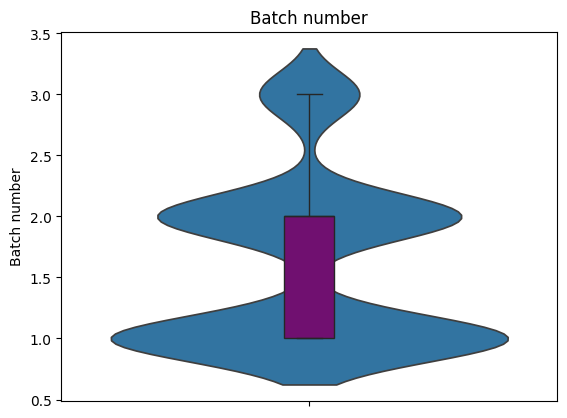

Plotting Div calculated...


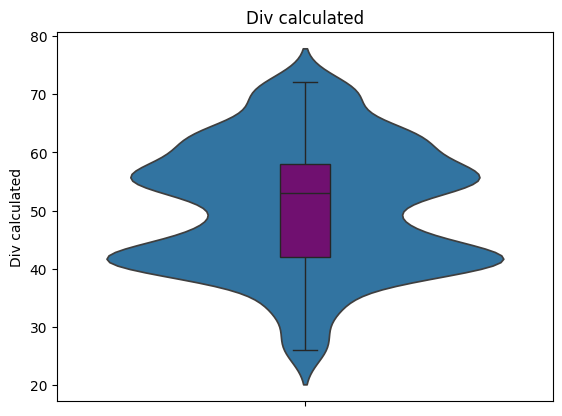

Plotting Capacitance...


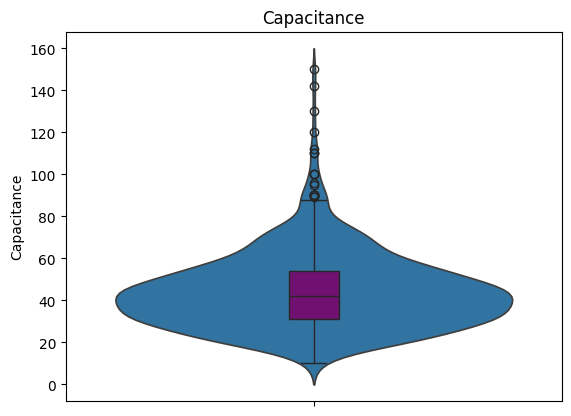

Plotting Input Resistance...


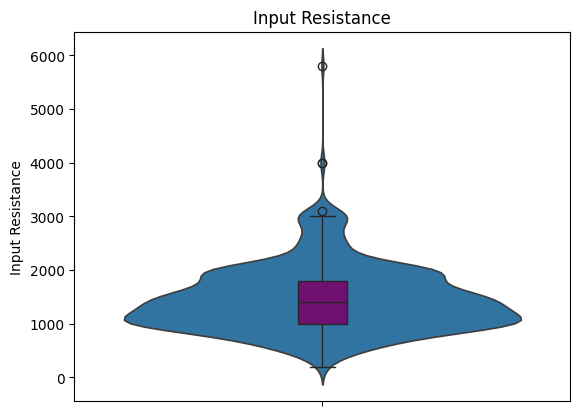

Plotting Resting membrane potential ...


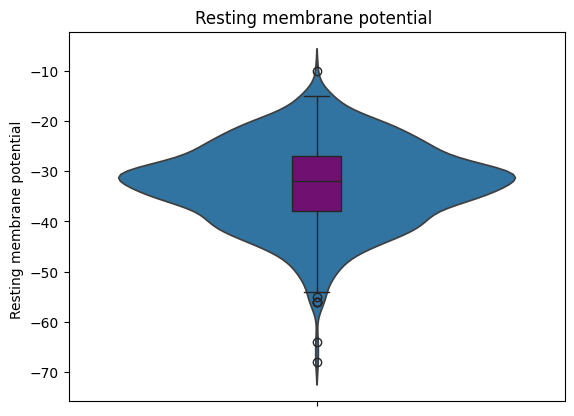

Plotting Maximum firing ...


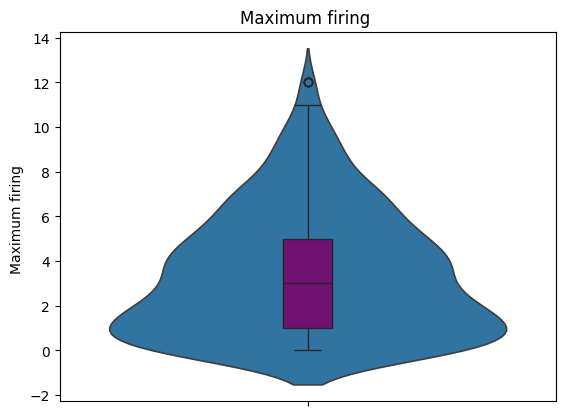

Plotting Rheobase...


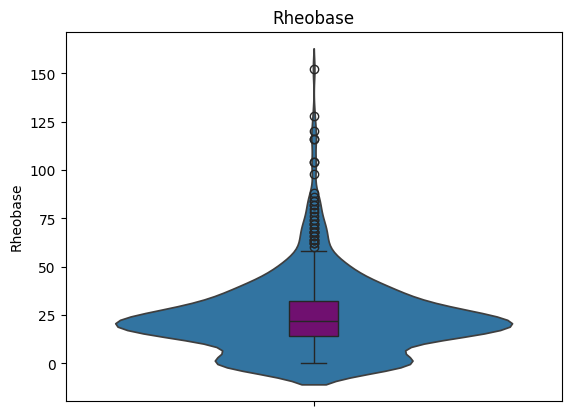

Plotting EPSC freq...


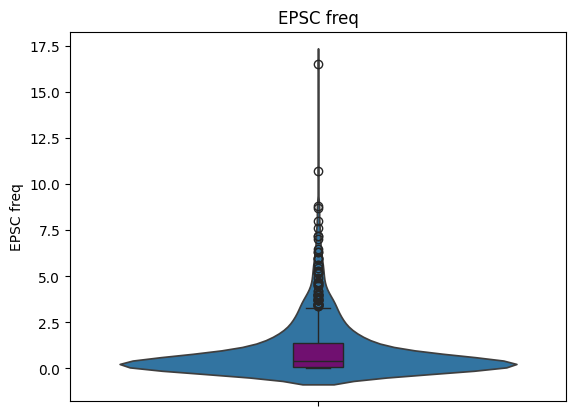

Plotting Genotype Neuron...


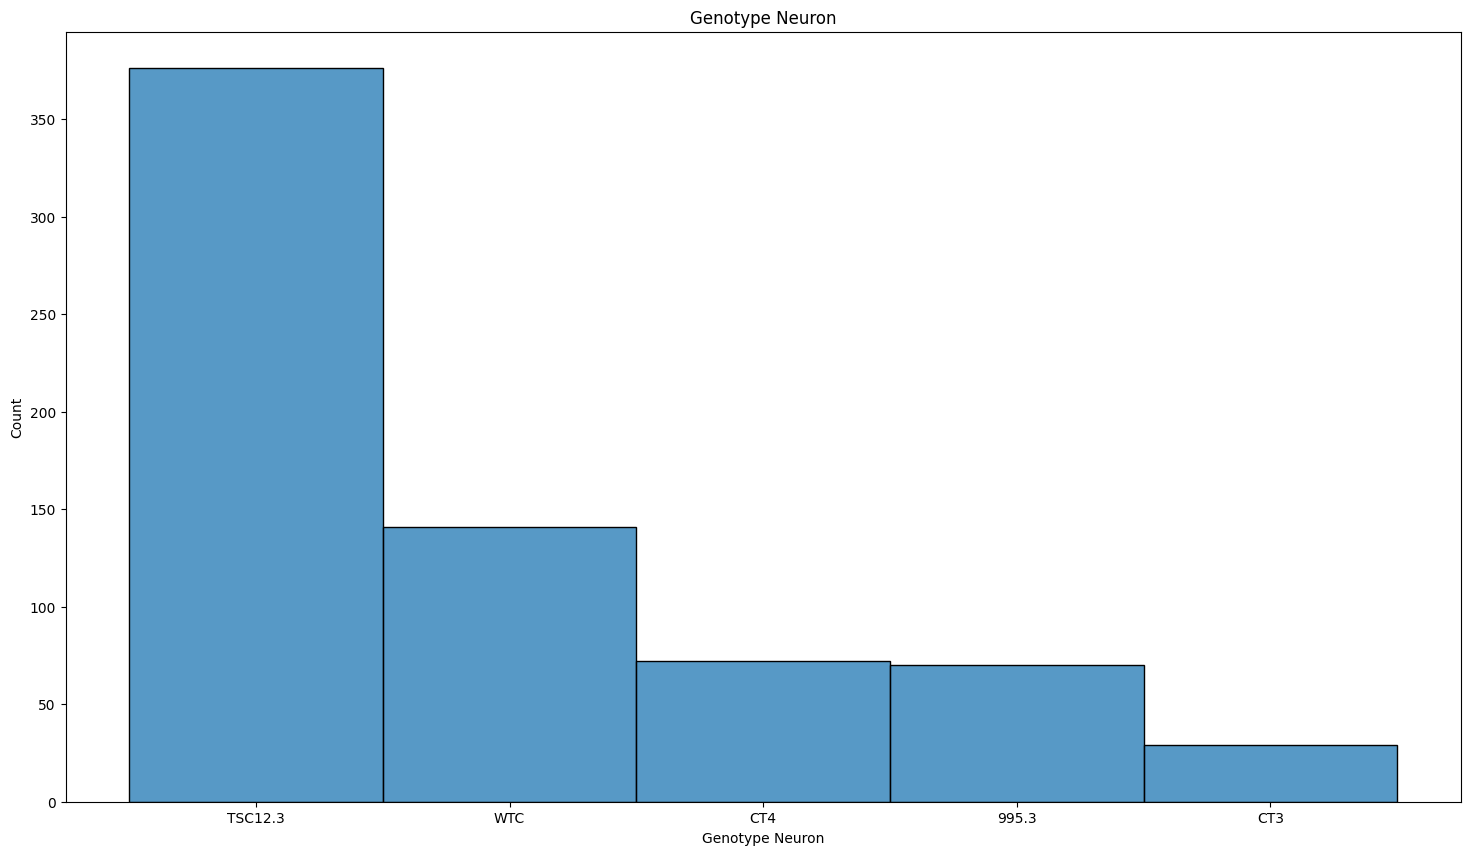

Plotting Culture treatment...


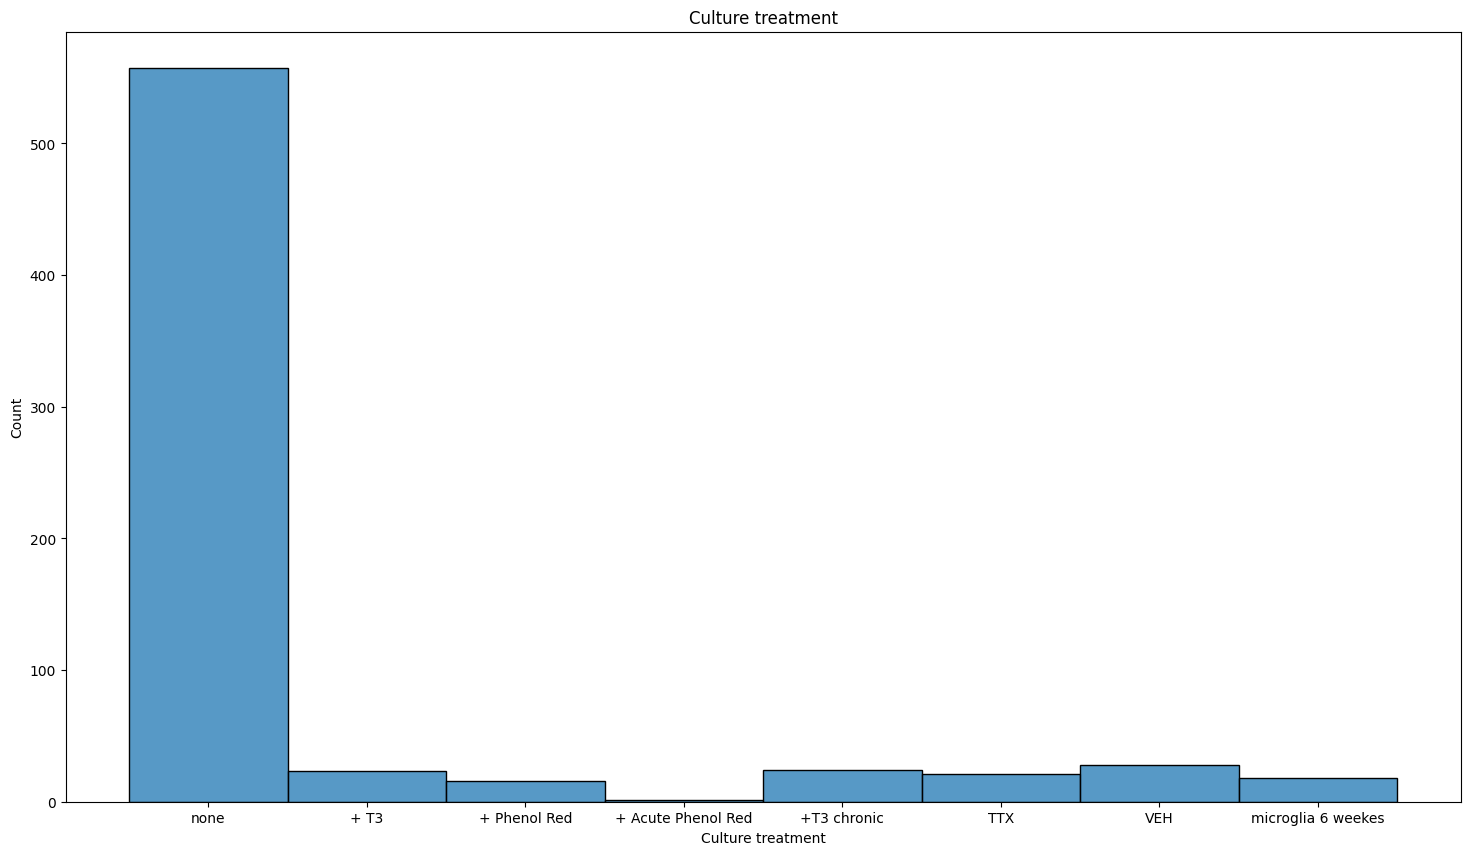

In [357]:

"""
Plots violin and box plots for each feature against the 'Batch number' column.
"""

for i, feature in enumerate(data_extracted_features_imputed.columns): 
    print(f"Plotting {feature}...")
    if not os.path.exists('run_1/qc/plots/imputed'):
        os.makedirs('run_1/qc/plots/imputed')
    if data_extracted_features_imputed[feature].dtype == 'object':
        # Plot violin and box plots for categorical features
        plt.figure(figsize=(18, 10))
        sns.histplot(data=data_extracted_features_imputed[feature].astype(str))
        plt.title(feature)
        plt.savefig(f"run_1/qc/plots/imputed/{'_'.join(feature.split(' '))}_hist.png")
        plt.show()
        #sns.boxplot(data=data_extracted_features_violin_pre, width=0.1, color="purple", meanline=True)
    else:
        # Plot violin and box plots for other features
        sns.violinplot(data=data_extracted_features_imputed[feature], inner=None)
        sns.boxplot(data=data_extracted_features_imputed[feature], width=0.1, color="purple", meanline=True)
        plt.title(feature)
        plt.savefig(f"run_1/qc/plots/imputed/{'_'.join(feature.split(' '))}_violin.png")
        plt.show()

# Adjust the layout and display the plot
# plt.tight_layout()
# plt.show()


## GLM imputation

In [251]:
# from sklearn.linear_model import LinearRegression

# data_extracted_features_impute_glm = data_extracted_features.copy()

# imputer_glm = IterativeImputer(estimator=LinearRegression())

# mask_glm = data_extracted_features_impute_glm['EPSC freq'].notna() & data_extracted_features_impute_glm['EPSC freq'].str.contains(">")
# data_extracted_features_impute_glm.loc[mask_glm, 'EPSC freq'] = np.nan

# data_extracted_features_impute_glm['EPSC freq'] = pd.to_numeric(data_extracted_features_impute_glm['EPSC freq'])

# # Drop object columns for imputation. The columns which contain categorical values will be dropped for the MICE imputation to work.
# # These columns will be added back after imputation.
# object_columns_glm = data_extracted_features_impute_glm.select_dtypes(include=['object']).columns
# data_extracted_features_impute_glm_copy = data_extracted_features_impute_glm.drop(columns=object_columns_glm)

# # Fit the imputer to your data
# data_extracted_features_imputed_glm = imputer_glm.fit(data_extracted_features_impute_glm_copy)

# # Impute missing values
# data_extracted_features_imputed_glm = imputer_glm.transform(data_extracted_features_impute_glm_copy)
# data_extracted_features_imputed_glm = pd.DataFrame(data_extracted_features_imputed_glm, columns=data_extracted_features_impute_glm_copy.columns)


# # Add back the object columns
# for column in object_columns_glm: 
#     data_extracted_features_imputed_glm[column] = data_extracted_features_impute_glm[column]

# # data_extracted_features_impute_glm.to_excel("Output.xlsx")

# # Print imputed values for each column
# for column_glm in data_extracted_features.columns:
#     missing_mask_column_glm = data_extracted_features_imputed_glm[column_glm].isnull()
#     imputed_missing_mask_column_glm = data_extracted_features_imputed_glm[column_glm].isnull()
#     imputed_values_mask_column_glm = (missing_mask_column_glm) & (~imputed_missing_mask_column_glm)
#     imputed_values_column_glm = data_extracted_features_impute_glm.loc[imputed_values_mask_column_glm, column_glm]
#     imputed_value_glm = data_extracted_features_imputed_glm.loc[imputed_values_mask_column_glm, column_glm]
#     if not imputed_values_column_glm.empty:
#         imputed_value_pairs_glm = [(original_glm, imputed_glm) for original_glm, imputed_glm in zip(imputed_values_column_glm, imputed_value_glm)]
#         print(f"Imputed values for {column_glm}:")
#         formatted_output = "\n".join([f"Index: {index_glm + 2}\nOriginal Value: {original_glm} --> Imputed value: {imputed_glm}" for index_glm, (original_glm, imputed_glm) in zip(imputed_values_column_glm.index, imputed_value_pairs_glm)])
#         print(formatted_output + "\n")

## Unsupervised learning

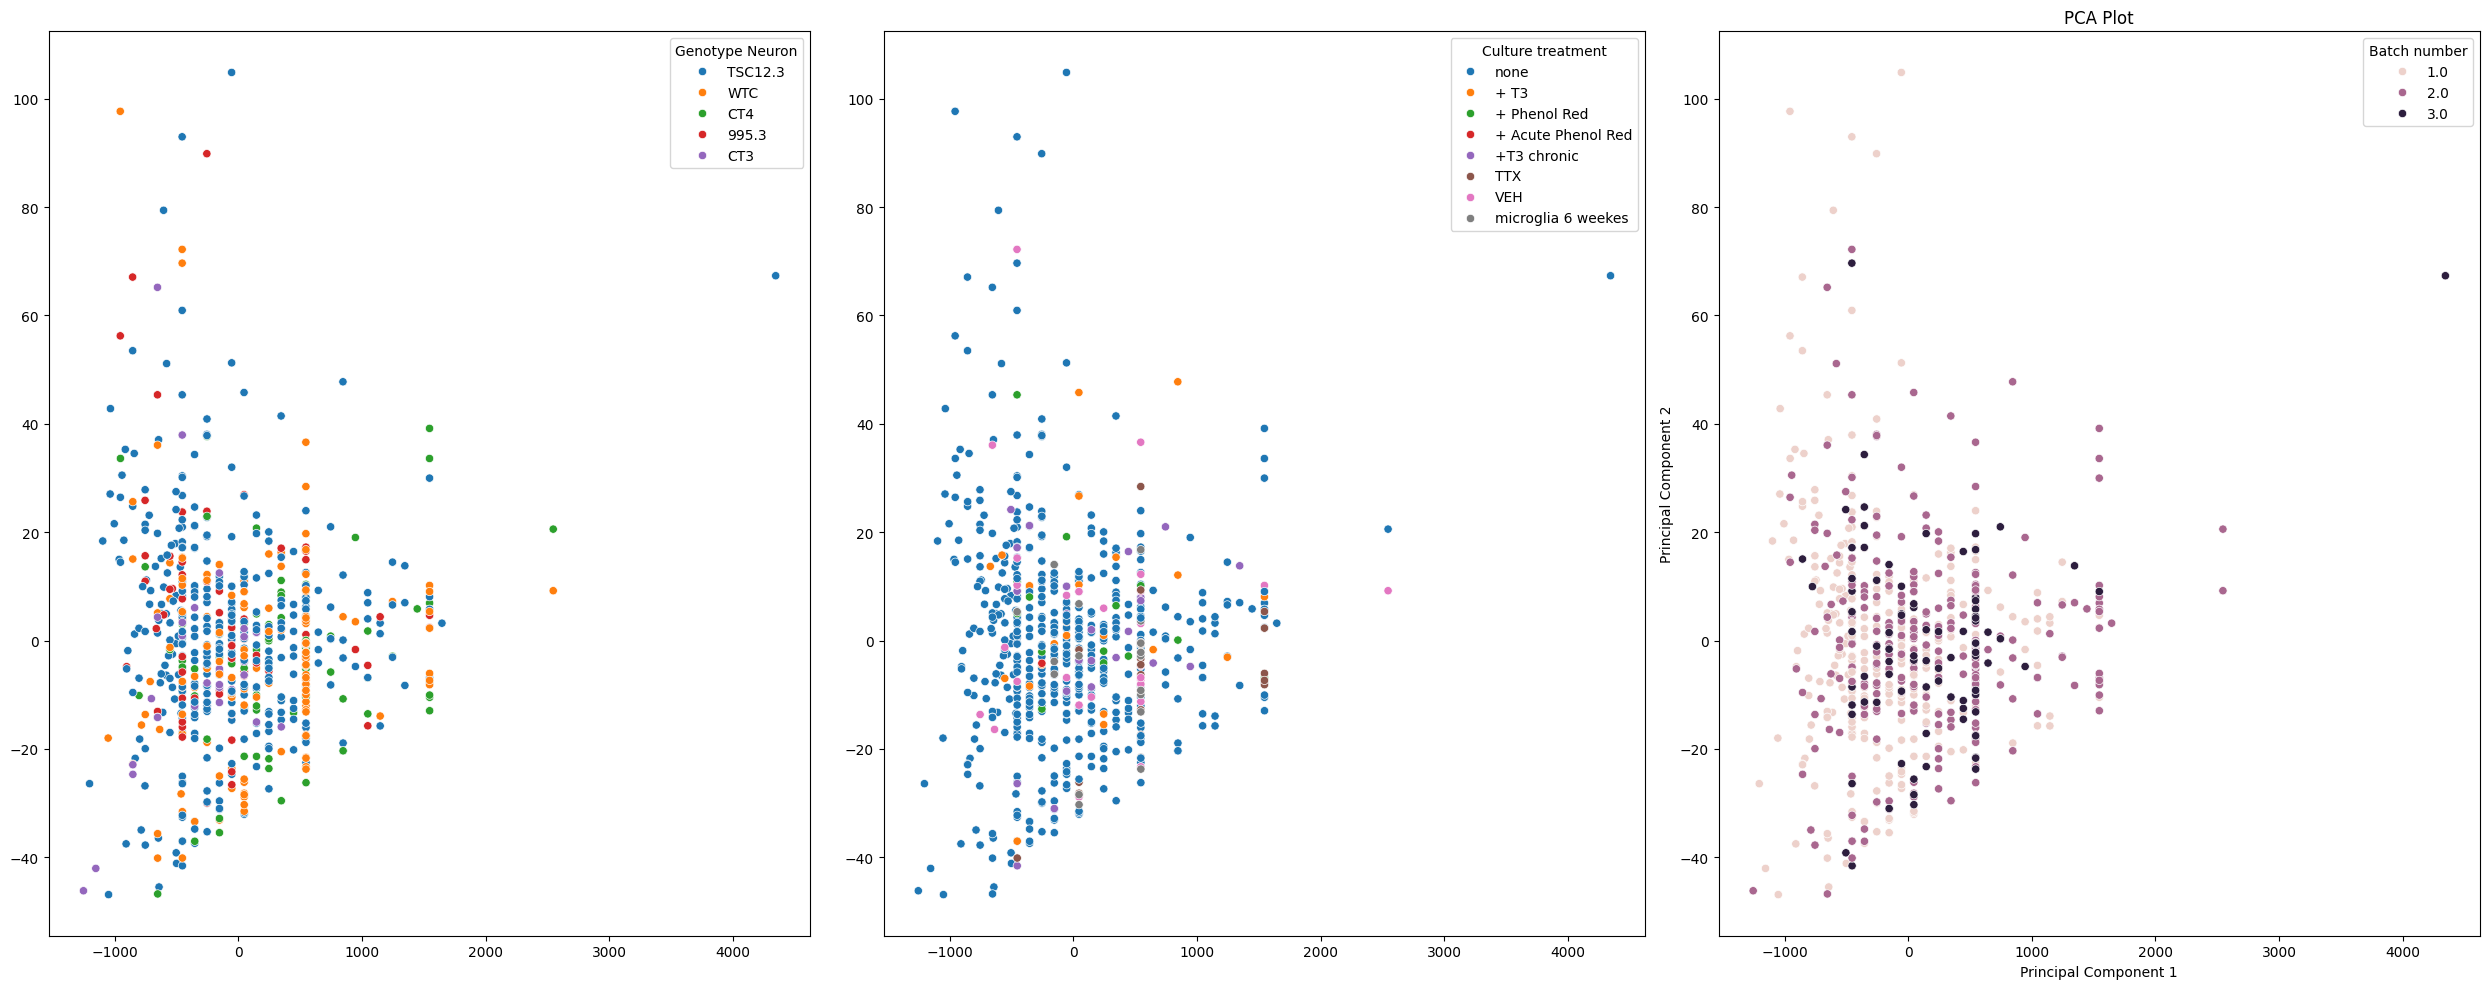

In [252]:
# from sklearn.decomposition import PCA

# data_extracted_features_imputed_labeled = data_extracted_features_imputed.copy()
# object_columns_pca = list(data_extracted_features_impute.select_dtypes(include=['object']).columns)
# object_columns_pca.append("Batch number")
# # print(object_columns_pca)   
# #print(data_extracted_features_imputed_labeled.columns)
# data_extracted_features_imputed_labeled.drop(columns=object_columns_pca, inplace=True)    


# # # Assuming 'categorical_column' is the name of the column containing categorical variables
# # label_encoder = LabelEncoder()
# # data_extracted_features_imputed_labeled['Genotype Neuron'] = label_encoder.fit_transform(data_extracted_features_imputed_labeled['Genotype Neuron'].astype(str))  
# # print(f"Original values: {label_encoder.classes_}\n Label encoded values: {data_extracted_features_imputed_labeled['Genotype Neuron'].unique()}")
# # data_extracted_features_imputed_labeled['Culture treatment'] = label_encoder.fit_transform(data_extracted_features_imputed_labeled['Culture treatment'])  
# # print(f"Original values: {label_encoder.classes_}\n Label encoded values: {data_extracted_features_imputed_labeled['Culture treatment'].unique()}")

# # Assuming data is your dataset
# pca = PCA(n_components=2)
# reduced_data = pca.fit_transform(data_extracted_features_imputed_labeled)

# fig, axes = plt.subplots(1, 3, figsize=(25, 10))
# axes = axes.flatten()

# for i, feature in enumerate(object_columns_pca):
#     sns.scatterplot(data=pd.DataFrame(reduced_data), x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data_extracted_features_imputed[feature], ax=axes[i])
#     plt.xlabel('Principal Component 1')
#     plt.ylabel('Principal Component 2')
#     plt.title('PCA Plot')

# plt.tight_layout()
# plt.show()


## K means clustering

Index(['Batch number', 'Div calculated', 'Capacitance', 'Input Resistance',
       'Resting membrane potential ', 'Maximum firing ', 'Rheobase',
       'EPSC freq', 'Genotype Neuron', 'Culture treatment'],
      dtype='object')
Original values: 995.3 CT3 CT4 TSC12.3 WTC
 Label encoded values: [3 0 4 1 2]
Original values: + Acute Phenol Red + Phenol Red + T3 +T3 chronic TTX VEH microglia 6 weekes none
 Label encoded values: [7 6 2 1 3 4 5 0]
Original values: 995.3 CT3 CT4 TSC12.3 WTC
 Label encoded values: [3 4 2 0 1]
Original values: + Acute Phenol Red + Phenol Red + T3 +T3 chronic TTX VEH microglia 6 weekes none
 Label encoded values: [7 2 1 0 3 4 5 6]
Cluster labels: 
[0 1]
0    493
1     57
Name: Cluster, dtype: int64


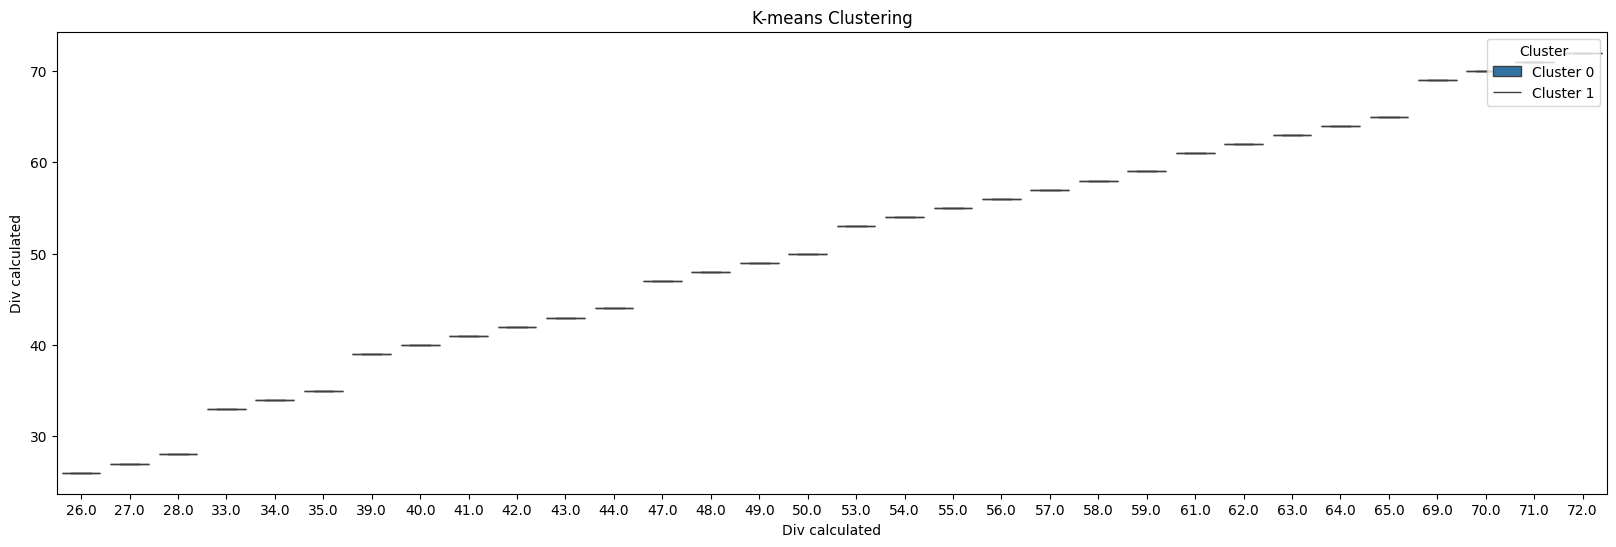

In [285]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import LabelEncoder

# data_extracted_features_imputed_kmeans_labeled = data_extracted_features_imputed.copy() 

# print(data_extracted_features_imputed_kmeans_labeled.columns)   

# X_train, X_test= train_test_split(data_extracted_features_imputed_kmeans_labeled, test_size=0.2, random_state=0)

# label_encoder = LabelEncoder()
# X_train['Genotype Neuron'] = label_encoder.fit_transform(X_train['Genotype Neuron'].astype(str))  
# print(f"Original values: {' '.join(label_encoder.classes_)}\n Label encoded values: {X_train['Genotype Neuron'].unique()}")
# X_train['Culture treatment'] = label_encoder.fit_transform(X_train['Culture treatment'])  
# print(f"Original values: {' '.join(label_encoder.classes_)}\n Label encoded values: {X_train['Culture treatment'].unique()}")

# data_extracted_features_imputed_kmeans_labeled['Genotype Neuron'] = label_encoder.fit_transform(data_extracted_features_imputed_kmeans_labeled['Genotype Neuron'].astype(str))  
# print(f"Original values: {' '.join(label_encoder.classes_)}\n Label encoded values: {data_extracted_features_imputed_kmeans_labeled['Genotype Neuron'].unique()}")
# data_extracted_features_imputed_kmeans_labeled['Culture treatment'] = label_encoder.fit_transform(data_extracted_features_imputed_kmeans_labeled['Culture treatment'])  
# print(f"Original values: {' '.join(label_encoder.classes_)}\n Label encoded values: {data_extracted_features_imputed_kmeans_labeled['Culture treatment'].unique()}")

# kmeans = KMeans(n_clusters=2, random_state=0)

# # Fit the KMeans model to the data
# kmeans.fit(X_train)

# cluster_labels = kmeans.labels_
# print(f"Cluster labels: \n{np.unique(cluster_labels)}")   

# # Add the cluster labels to your DataFrame
# X_train['Cluster'] = cluster_labels
# #print(data_extracted_features_imputed_kmeans_labeled['Cluster'])

# # Print the counts of samples in each cluster
# print(X_train['Cluster'].value_counts())


# plt.figure(figsize=(20, 6))
# sns.boxplot(data= data_extracted_features_imputed_kmeans_labeled, x=X_train["Div calculated"], y= data_extracted_features_imputed_kmeans_labeled["Div calculated"])  
# plt.xlabel('Div calculated')
# plt.ylabel('Div calculated')
# plt.title('K-means Clustering')
# plt.legend(labels=['Cluster 0', 'Cluster 1'], loc='upper right', title='Cluster')
# plt.show()


Original values: 995.3 CT3 CT4 TSC12.3 WTC
 Label encoded values: [3 4 2 0 1]
Original values: + Acute Phenol Red + Phenol Red + T3 +T3 chronic TTX VEH microglia 6 weekes none
 Label encoded values: [7 2 1 0 3 4 5 6]


c:\Users\wesle\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


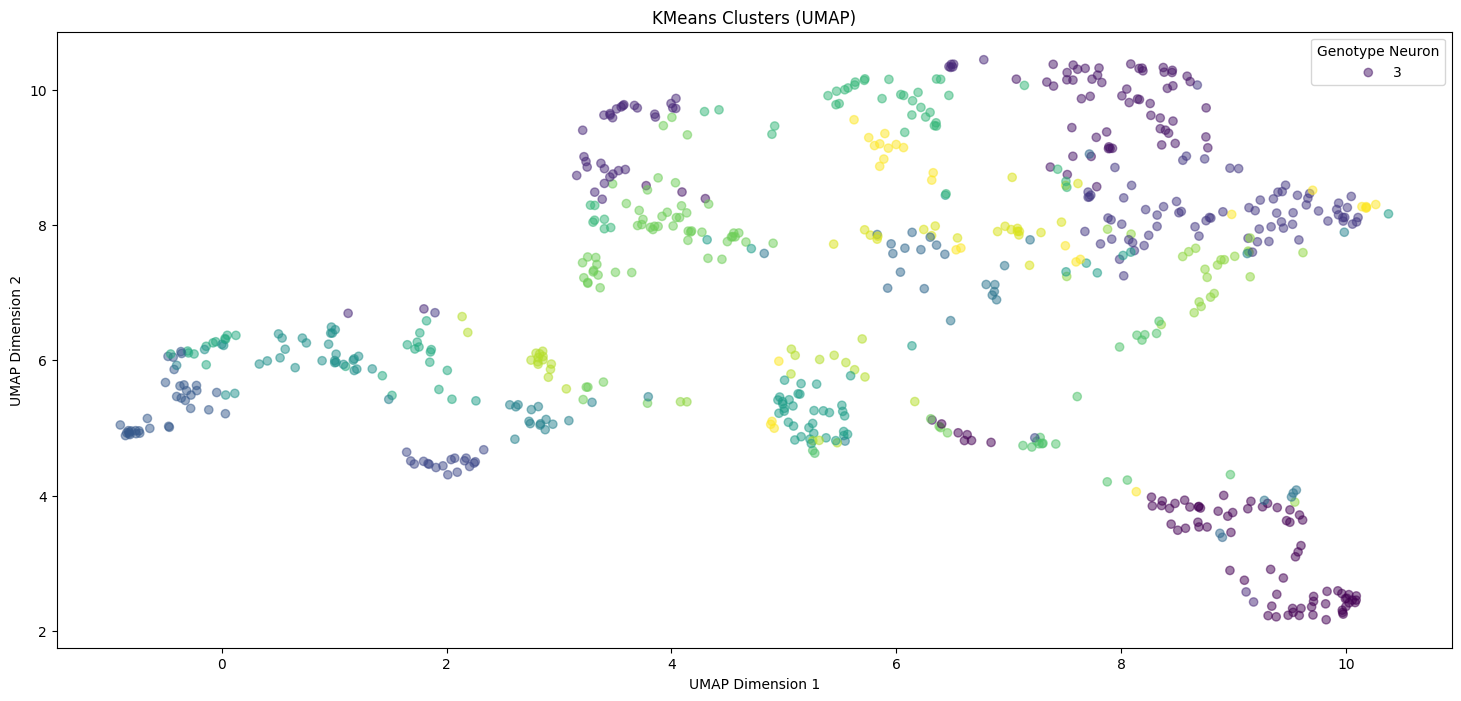

In [421]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

data_extracted_features_imputed_kmeans_labeled = data_extracted_features_imputed.copy() 

# data_extracted_features_imputed_kmeans_labeled_features = data_extracted_features_imputed_kmeans_labeled.drop(columns=['Div calculated'])
# div_column = data_extracted_features_imputed_kmeans_labeled['Div calculated']

label_encoder = LabelEncoder()
data_extracted_features_imputed_kmeans_labeled['Genotype Neuron'] = label_encoder.fit_transform(data_extracted_features_imputed_kmeans_labeled['Genotype Neuron'].astype(str))  
genotype_dict = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))  
print(f"Original values: {' '.join(label_encoder.classes_)}\n Label encoded values: {data_extracted_features_imputed_kmeans_labeled['Genotype Neuron'].unique()}")
data_extracted_features_imputed_kmeans_labeled['Culture treatment'] = label_encoder.fit_transform(data_extracted_features_imputed_kmeans_labeled['Culture treatment'])  
culture_dict = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Original values: {' '.join(label_encoder.classes_)}\n Label encoded values: {data_extracted_features_imputed_kmeans_labeled['Culture treatment'].unique()}")

# data_extracted_features_imputed_kmeans_labeled_features_numeric = data_extracted_features_imputed_kmeans_labeled.select_dtypes(include=['float64', 'int64'])   

# print(data_extracted_features_imputed_kmeans_labeled_features_numeric)
# print(genotype_dict)
# print(culture_dict)

#print(data_extracted_features_imputed_kmeans_labeled)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_extracted_features_imputed_kmeans_labeled)

kmeans = KMeans(n_clusters=19, random_state=50)
kmeans.fit(scaled_features)

clusters = kmeans.predict(scaled_features)

# data_extracted_features_imputed_kmeans_labeled['cluster'] = clusters

umap_model = umap.UMAP(n_components=2, random_state=0)
umap_components = umap_model.fit_transform(scaled_features)

umap_df = pd.DataFrame(data=umap_components, columns=['UMAP1', 'UMAP2'])

umap_df['Cluster'] = kmeans.labels_

plt.figure(figsize=(18, 8))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df['Cluster'], cmap='viridis', alpha=0.5)
plt.legend(data_extracted_features_imputed_kmeans_labeled["Genotype Neuron"], title="Genotype Neuron")

# plt.gca().add_artist(legend1)

plt.title('KMeans Clusters (UMAP)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
# plt.legend(title='Batch number', loc='best', labels=data_extracted_features_imputed_kmeans_labeled['Batch number']) 
plt.show()

# print(data_extracted_features_imputed_kmeans_labeled[['Div calculated', 'cluster']].groupby('cluster').mean())

# plt.figure(figsize=(20, 6))
# # sns.boxplot(data=data_extracted_features_imputed_kmeans_labeled, x=data_extracted_features_imputed_kmeans_labeled['Div calculated'], y=data_extracted_features_imputed_kmeans_labeled['Capacitance'])
# sns.scatterplot(data=data_extracted_features_imputed_kmeans_labeled["cluster"])
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('K-Means Clustering')
# plt.legend(labels=['Cluster 0', 'Cluster 1'], loc='upper right', title='Cluster')
# plt.show()


## Validatie (template perhaps?)

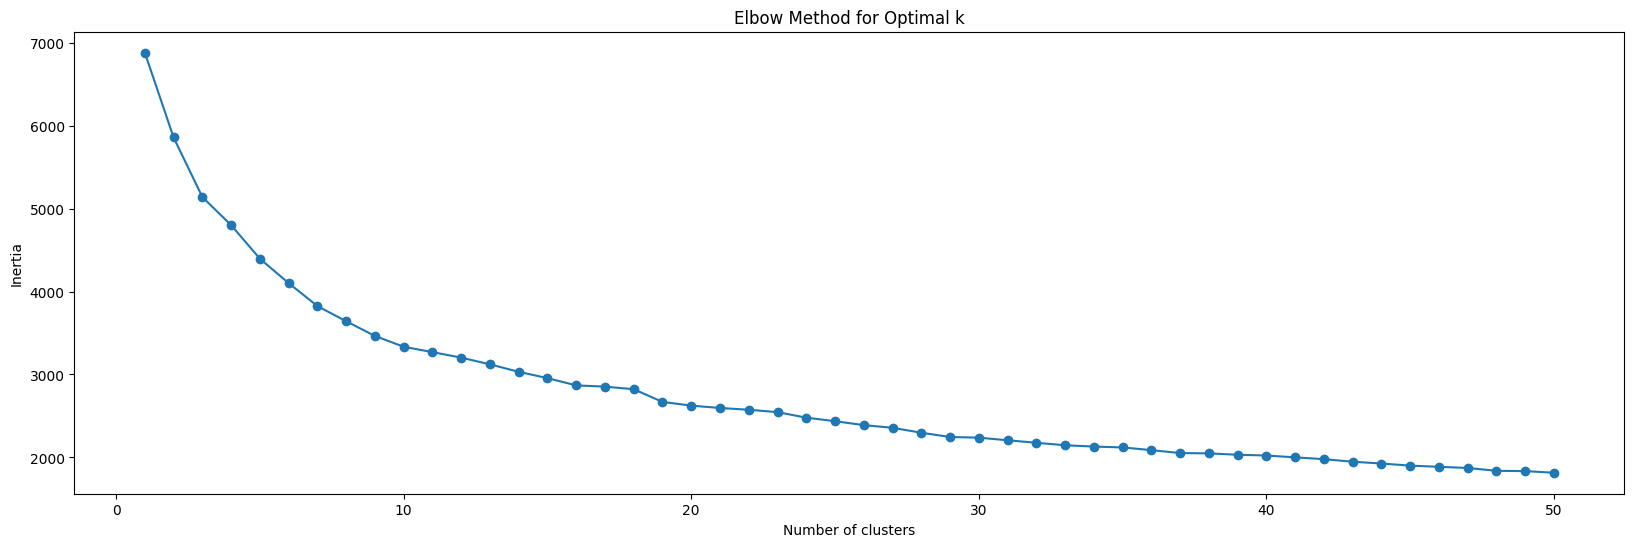

In [420]:
inertias = []
for k in range(1, 51):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(20, 6))
plt.plot(range(1, 51), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [422]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.14173789568573297
